# Tut-12 : CodeBasics : K Fold cross Validation

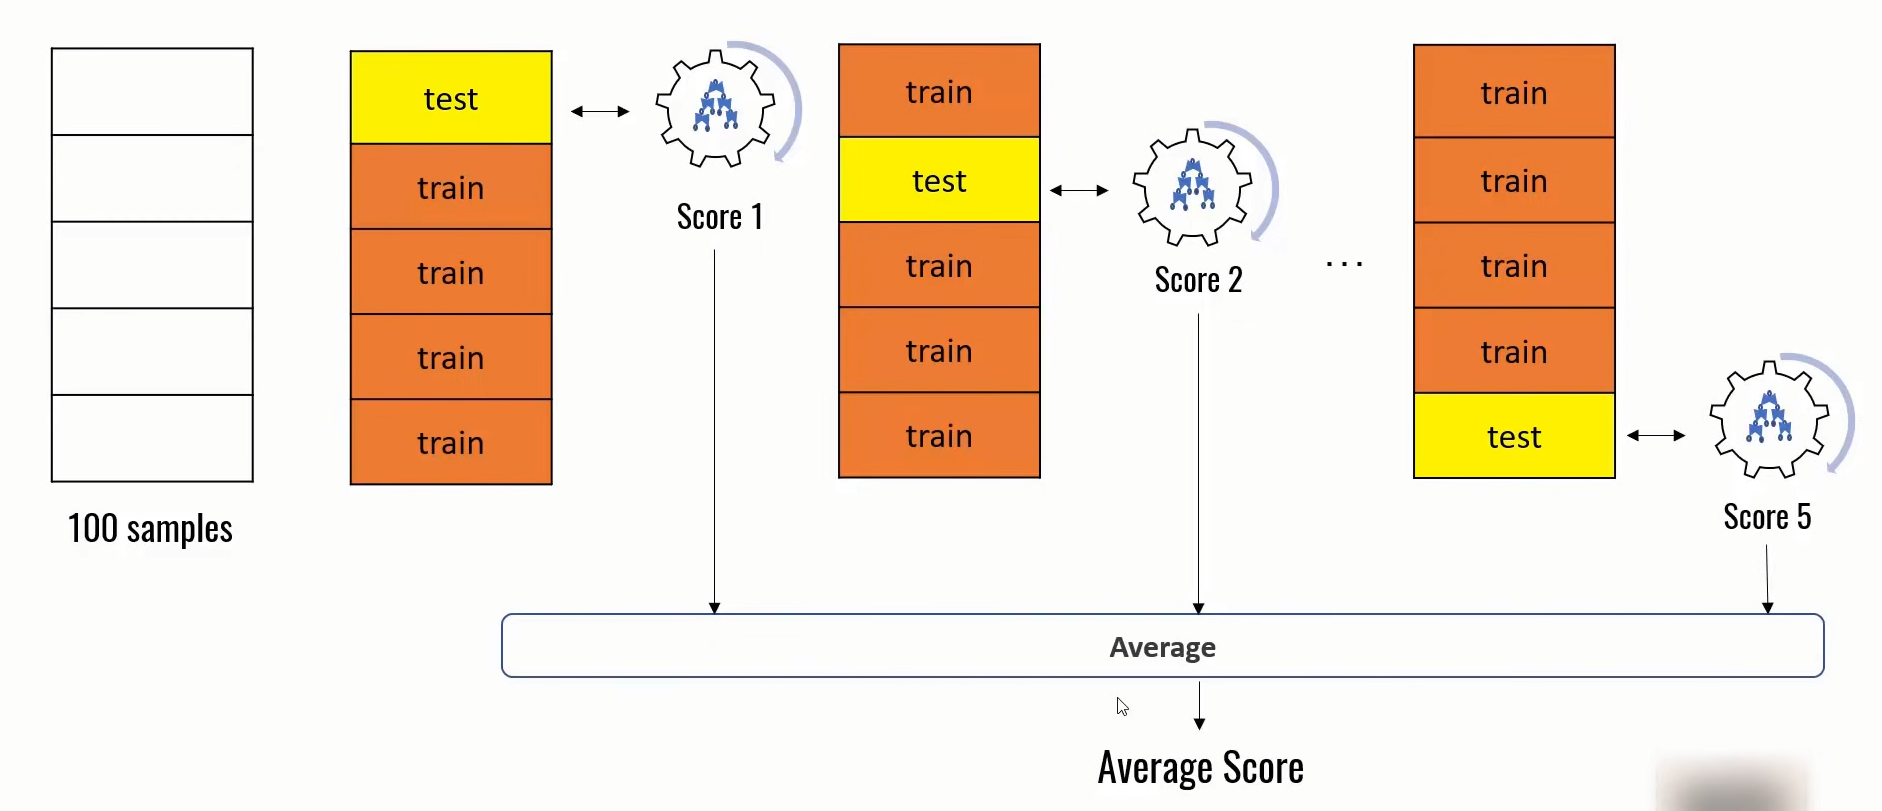

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [22]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr , yts = train_test_split( digits.data , digits.target , train_size=0.2 )

In [23]:
# first classifier : logistic regression

lrmod = LogisticRegression( max_iter=10000)
lrmod.fit(xtr , ytr)
lrmod.score( xts , yts)

0.952712100139082

In [24]:
# second classifier : SVM (support vector machine )

svmmod = SVC()
svmmod.fit(xtr , ytr)
svmmod.score( xts , yts)

0.9673157162726008

In [25]:
# third classifier : Random Forest Algo

rfmod = RandomForestClassifier( n_estimators=40 )
rfmod.fit(xtr , ytr)
rfmod.score( xts , yts)

0.9394993045897079

In [27]:
from sklearn.model_selection import KFold

kf = KFold( n_splits =3 )
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [28]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]) :
    print(train_index , test_index )


[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [29]:
def get_score( model , x_train , x_test , y_train , y_test ):
    model.fit(x_train , y_train )
    return model.score( x_test , y_test )

In [30]:
get_score( SVC() , xtr , xts , ytr , yts )   # working well

0.9673157162726008

In [31]:
from sklearn.model_selection import StratifiedKFold  

# stratified KFold : splits dataset in a uniform format ( better than KFold )

folds = StratifiedKFold( n_splits=3 )


In [37]:
score_lr = []
score_svm = []
score_rf = []

for train_index , test_index in kf.split( digits.data ) :
    
    x_tr , x_ts , y_tr , y_ts = digits.data[ train_index ] , digits.data[ test_index ] , digits.target[ train_index ] , digits.target[ test_index ]
    
    score_lr.append( get_score( LogisticRegression( max_iter=10000 ) , x_tr , x_ts , y_tr , y_ts )  )
    score_svm.append( get_score( SVC() , x_tr , x_ts , y_tr , y_ts )  )
    score_rf.append( get_score( RandomForestClassifier( n_estimators=40 ) , x_tr , x_ts , y_tr , y_ts )  )

In [38]:
score_lr , score_svm , score_rf 

([0.9282136894824707, 0.9415692821368948, 0.9165275459098498],
 [0.9666110183639399, 0.9816360601001669, 0.9549248747913188],
 [0.9181969949916527, 0.9565943238731218, 0.9332220367278798])

In [39]:
# using cross validation model , you can do the samething easily 

from sklearn.model_selection import cross_val_score


In [41]:
cross_val_score( LogisticRegression(max_iter=10000) , digits.data , digits.target )

array([0.925     , 0.87777778, 0.93871866, 0.93593315, 0.89693593])

In [42]:
cross_val_score( SVC() , digits.data , digits.target )

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [44]:
cross_val_score( RandomForestClassifier( n_estimators=30 ) , digits.data , digits.target )

array([0.92777778, 0.89722222, 0.94707521, 0.95543175, 0.92200557])